<a href="https://colab.research.google.com/github/bumbum2403/Learning_GIT/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [3]:
# Let's view the first few rows
print("Customers DataFrame:")
print(customers_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

print("\nTransactions DataFrame:")
print(transactions_df.head())


Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00

In [9]:
print("Data Types:")
print(customers_df.dtypes)
print(products_df.dtypes)
print(transactions_df.dtypes)

# also let's perform a check for missing/duplicate values in the df

print("Missing values in Customers:")
print(customers_df.isnull().sum())

print("\nMissing values in Products:")
print(products_df.isnull().sum())

print("\nMissing values in Transactions:")
print(transactions_df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows in Customers:", customers_df.duplicated().sum())
print("Duplicate rows in Products:", products_df.duplicated().sum())
print("Duplicate rows in Transactions:", transactions_df.duplicated().sum())


Data Types:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object
Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


# SMALL PREPROCESSING STEP

For starters we can see that in TransactionDate column, we also have values for the corrresponding time, when the order was placed by the customer, so let's seperate that into a new column TransactionTime.
But first, we'll have to create it into a DateTime object...

In [10]:
# Convert TransactionDate to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
# while we're at it, let's just create the SignupDate into a datetime obj as well
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])


# Creating a new column for the time in transactions_df
transactions_df['TransactionTime'] = transactions_df['TransactionDate'].dt.time

# Update the TransactionDate column to only keep the date
transactions_df['TransactionDate'] = transactions_df['TransactionDate'].dt.date

print(transactions_df.head())


  TransactionID CustomerID ProductID TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067      2024-08-25         1      300.68   
1        T00112      C0146      P067      2024-05-27         1      300.68   
2        T00166      C0127      P067      2024-04-25         1      300.68   
3        T00272      C0087      P067      2024-03-26         2      601.36   
4        T00363      C0070      P067      2024-03-21         3      902.04   

    Price TransactionTime  
0  300.68        12:38:23  
1  300.68        22:23:54  
2  300.68        07:38:55  
3  300.68        22:55:37  
4  300.68        15:10:10  


# **TASK-1**

# EDA_1: Customer Segment by Region

In [12]:
customer_region_counts = customers_df['Region'].value_counts()

# Finding regions with the highest and lowest number of customers
most_customers_region = customer_region_counts.idxmax()
least_customers_region = customer_region_counts.idxmin()

print("Region with most customers:", most_customers_region, customer_region_counts[most_customers_region])
print("Region with least customers:", least_customers_region, customer_region_counts[least_customers_region])
print("Total number of customers:", len(customers_df))


Region with most customers: South America 59
Region with least customers: Asia 45
Total number of customers: 200


# EDA_2: Types and Categories of Products Sold

In [13]:
# First let's Merge transactions with products
transactions_products = pd.merge(transactions_df, products_df, on='ProductID', how='left')

# let's Count products sold by category
category_counts = transactions_products['Category'].value_counts()

most_sold_category = category_counts.idxmax()

print("Category-wise product sales:")
print(category_counts)
print("\nMost sold category:", most_sold_category, category_counts[most_sold_category])


Category-wise product sales:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

Most sold category: Books 270


In [17]:
all_data = pd.merge(transactions_products, customers_df, on='CustomerID', how='left')

# Group by category and region, then sum quantities
category_region_sales = all_data.groupby(['Category', 'Region'])['Quantity'].sum().reset_index()

# Find the country with maximum sales for each category
for category in category_region_sales['Category'].unique():
    max_sales_row = category_region_sales[category_region_sales['Category'] == category].loc[category_region_sales[category_region_sales['Category'] == category]['Quantity'].idxmax()]
    max_sales_country = max_sales_row['Region']
    max_sales_quantity = max_sales_row['Quantity']
    print(f"Category: {category}|| Country with maximum sales: {max_sales_country} ({max_sales_quantity} items sold)")

Category: Books|| Country with maximum sales: South America (241 items sold)
Category: Clothing|| Country with maximum sales: Asia (166 items sold)
Category: Electronics|| Country with maximum sales: South America (198 items sold)
Category: Home Decor|| Country with maximum sales: South America (192 items sold)


In [20]:
all_data = pd.merge(transactions_products, customers_df, on='CustomerID', how='left')
'''finding the country alone doesn't give us much of an insight,
 let's also find which is the highest selling product '''
# Group by category and product, then sum quantities
category_product_sales = all_data.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index()

# Find the most sold product within each category
for category in category_product_sales['Category'].unique():
    category_data = category_product_sales[category_product_sales['Category'] == category]
    max_sales_row = category_data.loc[category_data['Quantity'].idxmax()]
    most_sold_product = max_sales_row['ProductName']
    max_sales_quantity = max_sales_row['Quantity']
    print(f"Category: {category} || Most sold product: {most_sold_product} ({max_sales_quantity} items sold)")

Category: Books || Most sold product: SoundWave Cookbook (78 items sold)
Category: Clothing || Most sold product: ActiveWear Jacket (76 items sold)
Category: Electronics || Most sold product: ActiveWear Smartwatch (100 items sold)
Category: Home Decor || Most sold product: HomeSense Desk Lamp (81 items sold)


# EDA_3: Top Customers and Products by Revenue

In [18]:
# Merge transactions with customers
transactions_customers = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Total revenue by customer
customer_revenue = transactions_customers.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Top customers
print("Top customers by revenue:")
print(customer_revenue.head())


Top customers by revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [19]:
# Merge transactions with customers and products
all_data = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
all_data = pd.merge(all_data, products_df, on='ProductID', how='left')

# Calculate total revenue by customer
customer_revenue = all_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Get top customers
top_customers = customer_revenue.head(10).index  # Get top 10 customers

# Filter data for top customers and get their country and most purchased category
top_customer_data = all_data[all_data['CustomerID'].isin(top_customers)]
top_customer_country = top_customer_data.groupby('CustomerID')['Region'].first()  # Assuming one country per customer
top_customer_category = top_customer_data.groupby('CustomerID')['Category'].agg(lambda x: x.value_counts().index[0])  # Most frequent category


# Create a DataFrame for top customers with country and category
top_customers_df = pd.DataFrame({'Revenue': customer_revenue.head(10),
                                  'Country': top_customer_country,
                                  'Most Purchased Category': top_customer_category})

print("Top customers by revenue with country and category:")
print(top_customers_df)

Top customers by revenue with country and category:
             Revenue        Country Most Purchased Category
CustomerID                                                 
C0028        6819.57           Asia             Electronics
C0054        8040.39           Asia             Electronics
C0059        7073.28  North America              Home Decor
C0065        7663.70  North America              Home Decor
C0082        7572.91  South America                   Books
C0099        6715.72  South America                Clothing
C0141       10673.87         Europe                Clothing
C0156        7634.45  North America                   Books
C0165        6708.10  South America                   Books
C0188        7111.32  South America             Electronics


In [25]:
# Total revenue by product
product_revenue = transactions_products.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

# Top products
print("Top products by revenue:")
print(product_revenue.head())


Top products by revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


# EDA_4: Seasonality Trend Analysis

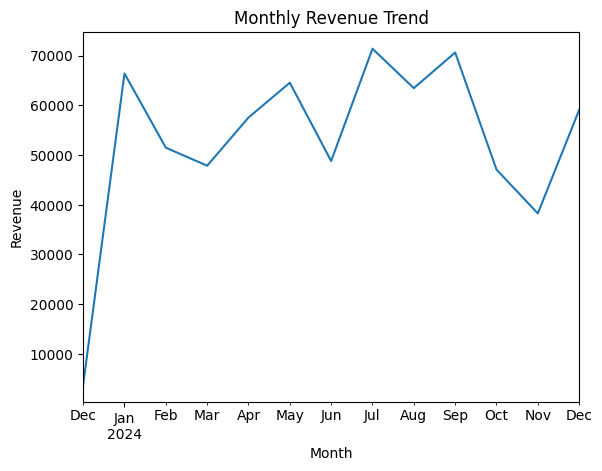

In [23]:
# let's add a new  'Month' column for seasonality analysis
transactions_df['Month'] = pd.to_datetime(transactions_df['TransactionDate']).dt.to_period('M')

# Group by month and calculate total revenue
monthly_revenue = transactions_df.groupby('Month')['TotalValue'].sum()

monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', xlabel='Month', ylabel='Revenue')
plt.show()


In [30]:
# Displaying monthly revenue
for month, revenue in monthly_revenue.items():
    print(f"Cumulative revenue by the end of {month}: {round(revenue, 2)}") # Use the round function instead of the round method.

Total revenue by the end of 2023-12: 3769.52
Total revenue by the end of 2024-01: 66376.39
Total revenue by the end of 2024-02: 51459.27
Total revenue by the end of 2024-03: 47828.73
Total revenue by the end of 2024-04: 57519.06
Total revenue by the end of 2024-05: 64527.74
Total revenue by the end of 2024-06: 48771.18
Total revenue by the end of 2024-07: 71366.39
Total revenue by the end of 2024-08: 63436.74
Total revenue by the end of 2024-09: 70603.75
Total revenue by the end of 2024-10: 47063.22
Total revenue by the end of 2024-11: 38224.37
Total revenue by the end of 2024-12: 59049.2


Cumulative Revenue by the end of each month:
Month
2023-12      3769.52
2024-01     70145.91
2024-02    121605.18
2024-03    169433.91
2024-04    226952.97
2024-05    291480.71
2024-06    340251.89
2024-07    411618.28
2024-08    475055.02
2024-09    545658.77
2024-10    592721.99
2024-11    630946.36
2024-12    689995.56
Freq: M, Name: TotalValue, dtype: float64


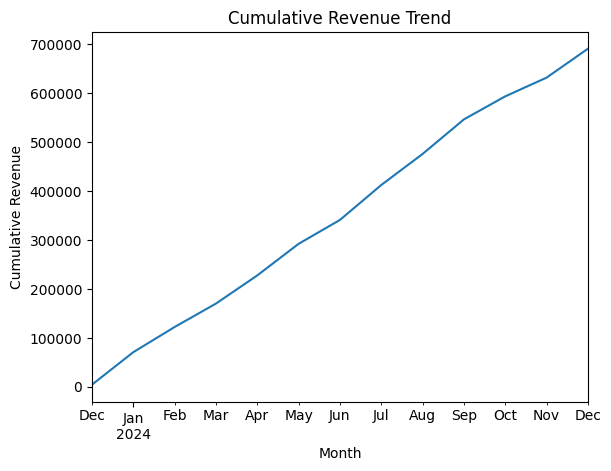

In [34]:
# let's Add a cumulative revenue column
'''let's look at how the nature of growth for our company
looking at the revenue data, it must be a linear type of growth'''
monthly_revenue = transactions_df.groupby('Month')['TotalValue'].sum()

monthly_revenue_cumulative = monthly_revenue.cumsum()

# Print cumulative revenue at the end of each month
print("Cumulative Revenue by the end of each month:")
print(monthly_revenue_cumulative)

# Plot cumulative revenue trend
monthly_revenue_cumulative.plot(kind='line', title='Cumulative Revenue Trend', xlabel='Month', ylabel='Cumulative Revenue')
plt.show()
